## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### EDA and Visualization

In [3]:
df = pd.read_csv("../data/master.csv")

In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.columns = [
    "country",
    "year",
    "sex",
    "age_group",
    "suicides",
    "population",
    "suicides/100k",
    "country_year",
    "hdi",
    "gdp_year",
    "gdp_per_capita",
    "generation",
]

In [6]:
df

,country,year,sex,age_group,suicides,population,suicides/100k,country_year,hdi,gdp_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


Since country_year is redundant, we drop it.

In [7]:
# df.drop(["country_year"], axis= 1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicides        27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides/100k   27820 non-null  float64
 7   country_year    27820 non-null  object 
 8   hdi             8364 non-null   float64
 9   gdp_year        27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Converting gdp_year to float

In [9]:
df["gdp_year"] = df["gdp_year"].str.replace(",", "")

In [10]:
df["gdp_year"] = df["gdp_year"].astype(float)
print(df.dtypes)

country            object
year                int64
sex                object
age_group          object
suicides            int64
population          int64
suicides/100k     float64
country_year       object
hdi               float64
gdp_year          float64
gdp_per_capita      int64
generation         object
dtype: object


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicides        27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides/100k   27820 non-null  float64
 7   country_year    27820 non-null  object 
 8   hdi             8364 non-null   float64
 9   gdp_year        27820 non-null  float64
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


In [12]:
df.head()

,country,year,sex,age_group,suicides,population,suicides/100k,country_year,hdi,gdp_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2.156625e+09,796,Boomers


In [13]:
df.shape

(27820, 12)

In [14]:
df.isna().sum()

country               0
year                  0
sex                   0
age_group             0
suicides              0
population            0
suicides/100k         0
country_year          0
hdi               19456
gdp_year              0
gdp_per_capita        0
generation            0
dtype: int64

In [15]:
df["hdi"].unique()

array([  nan, 0.619, 0.656, 0.695, 0.722, 0.781, 0.783, 0.694, 0.705,
       0.731, 0.762, 0.775, 0.811, 0.818, 0.831, 0.833, 0.836, 0.632,
       0.605, 0.648, 0.721, 0.723, 0.728, 0.733, 0.865, 0.882, 0.898,
       0.927, 0.93 , 0.932, 0.933, 0.935, 0.764, 0.794, 0.815, 0.853,
       0.879, 0.881, 0.884, 0.885, 0.609, 0.64 , 0.778, 0.78 , 0.774,
       0.786, 0.727, 0.816, 0.819, 0.817, 0.821, 0.824, 0.7  , 0.716,
       0.753, 0.765, 0.793, 0.785, 0.683, 0.796, 0.798, 0.806, 0.851,
       0.874, 0.866, 0.883, 0.886, 0.889, 0.888, 0.89 , 0.644, 0.664,
       0.701, 0.71 , 0.711, 0.715, 0.724, 0.576, 0.608, 0.702, 0.737,
       0.742, 0.746, 0.752, 0.755, 0.686, 0.696, 0.713, 0.749, 0.773,
       0.779, 0.782, 0.827, 0.849, 0.861, 0.867, 0.892, 0.903, 0.909,
       0.91 , 0.912, 0.654, 0.699, 0.788, 0.814, 0.83 , 0.832, 0.573,
       0.596, 0.629, 0.679, 0.706, 0.718, 0.72 , 0.623, 0.652, 0.682,
       0.704, 0.75 , 0.756, 0.761, 0.766, 0.807, 0.653, 0.685, 0.73 ,
       0.776, 0.772,

In [16]:
# df.drop(["hdi"], axis= 1,inplace=True)

In [17]:
df.head()

,country,year,sex,age_group,suicides,population,suicides/100k,country_year,hdi,gdp_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2.156625e+09,796,Boomers


In [18]:
df.isna().sum()

country               0
year                  0
sex                   0
age_group             0
suicides              0
population            0
suicides/100k         0
country_year          0
hdi               19456
gdp_year              0
gdp_per_capita        0
generation            0
dtype: int64

#### Visualization

In [19]:
import seaborn as sns

In [20]:
suicides_by_sex = df.groupby("sex")["suicides"].sum().reset_index()

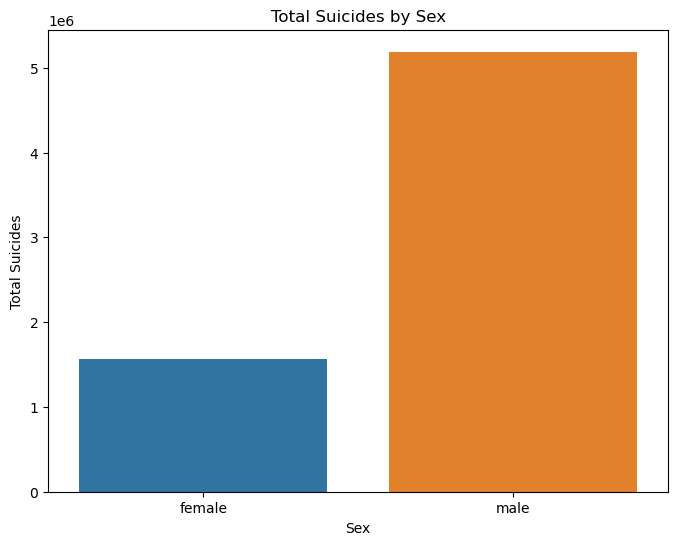

In [183]:
plt.figure(figsize=(8, 6))
sns.barplot(x="sex", y="suicides", data=suicides_by_sex)
plt.xlabel("Sex")
plt.ylabel("Total Suicides")
plt.title("Total Suicides by Sex")
plt.show()

From the plot above, it seems more males commit suicide than females

In [21]:
suicides_by_gen = df.groupby("generation")["suicides"].sum().reset_index()

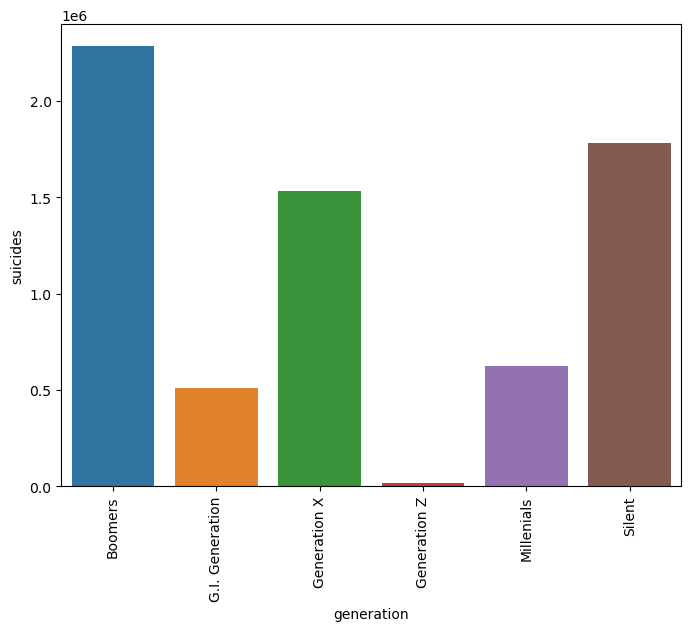

In [185]:
plt.figure(figsize=(8, 6))
sns.barplot(x="generation", y="suicides", data=suicides_by_gen)
plt.xticks(rotation=90)
plt.show()

In [22]:
suicides_by_gen_sex = (
    df.groupby(["generation", "sex"])["suicides"].sum().reset_index()
)

In [187]:
suicides_by_gen_sex

,generation,sex,suicides
0,Boomers,female,460968
1,Boomers,male,1823530
2,G.I. Generation,female,176653
3,G.I. Generation,male,333356
4,Generation X,female,309839
5,Generation X,male,1222965
6,Generation Z,female,6141
7,Generation Z,male,9765
8,Millenials,female,133620
9,Millenials,male,489839


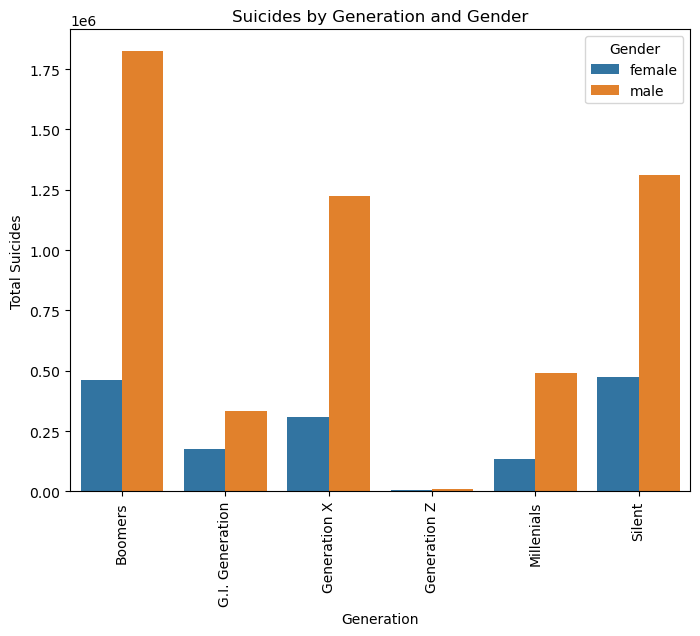

In [188]:
plt.figure(figsize=(8, 6))
sns.barplot(x="generation", y="suicides", hue="sex", data=suicides_by_gen_sex)
plt.xticks(rotation=90)
plt.xlabel("Generation")
plt.ylabel("Total Suicides")
plt.title("Suicides by Generation and Gender")
plt.legend(title="Gender")
plt.show()

In [23]:
suicides_by_age_sex = (
    df.groupby(["age_group", "sex"])["suicides"].sum().reset_index()
)

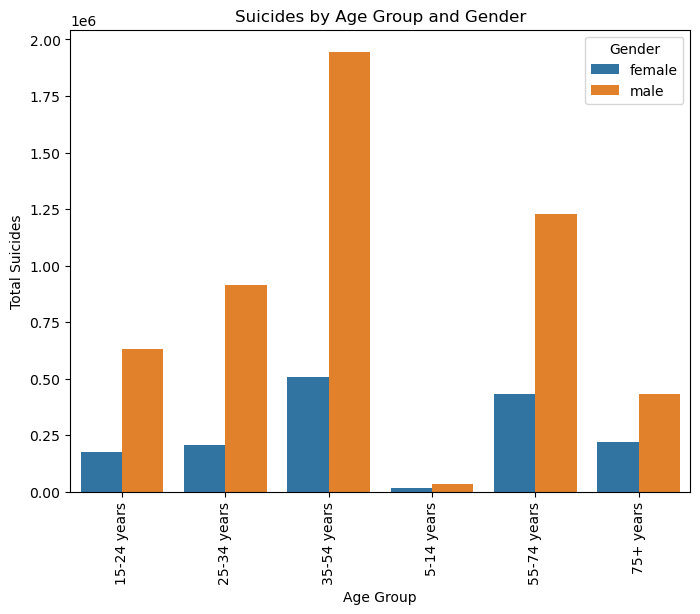

In [190]:
plt.figure(figsize=(8, 6))
sns.barplot(x="age_group", y="suicides", hue="sex", data=suicides_by_age_sex)
plt.xticks(rotation=90)
plt.xlabel("Age Group")
plt.ylabel("Total Suicides")
plt.title("Suicides by Age Group and Gender")
plt.legend(title="Gender")
plt.show()

In [24]:
df_avg = df.groupby("year")["suicides"].mean()

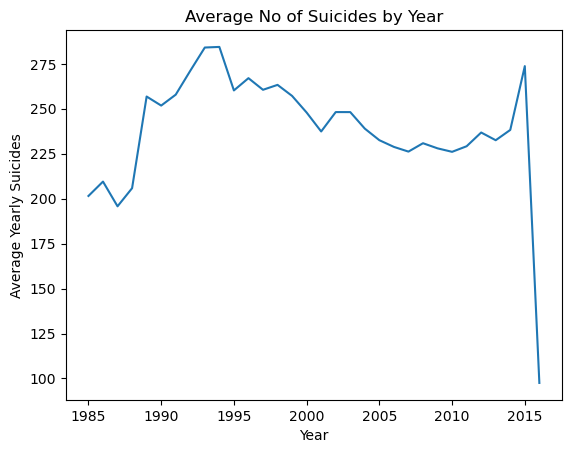

In [192]:
sns.lineplot(df_avg)
plt.xlabel("Year")
plt.ylabel("Average Yearly Suicides")
plt.title("Average No of Suicides by Year")
plt.show()

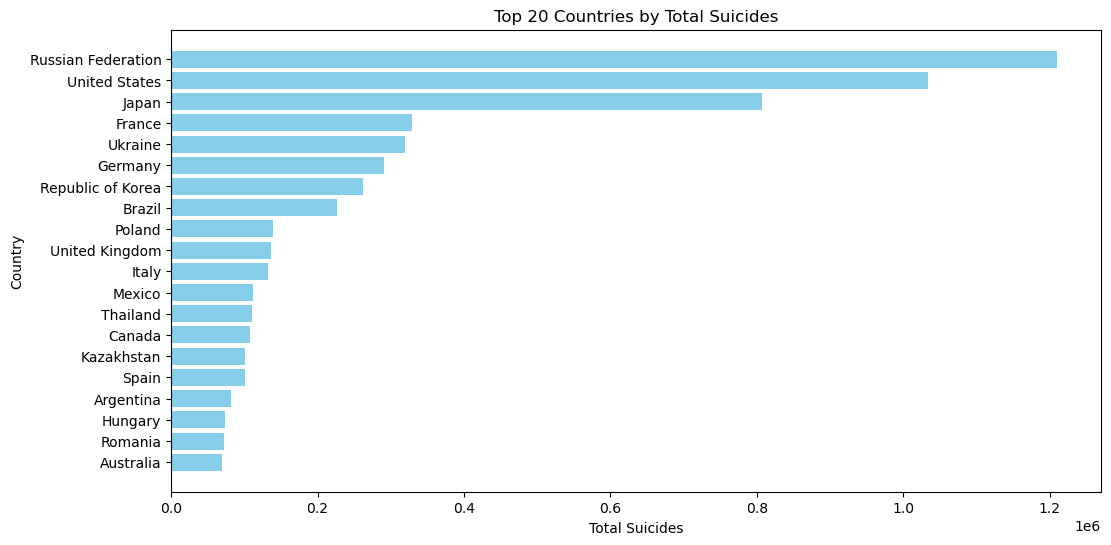

In [193]:
df = df.sort_values(by="suicides", ascending=False)

# Create a bar chart with bars whose widths represent the number of suicides
suicides_by_country = df.groupby("country")["suicides"].sum().reset_index()

# Sort the data by suicides in descending order
suicides_by_country = suicides_by_country.sort_values(
    by="suicides", ascending=False
)

# Select the top 20 countries
top_20_countries = suicides_by_country.head(20)

# Create a bar chart for the top 20 countries
plt.figure(figsize=(12, 6))
plt.barh(
    top_20_countries["country"], top_20_countries["suicides"], color="skyblue"
)
plt.xlabel("Total Suicides")
plt.ylabel("Country")
plt.title("Top 20 Countries by Total Suicides")
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest suicide count at the top
plt.show()

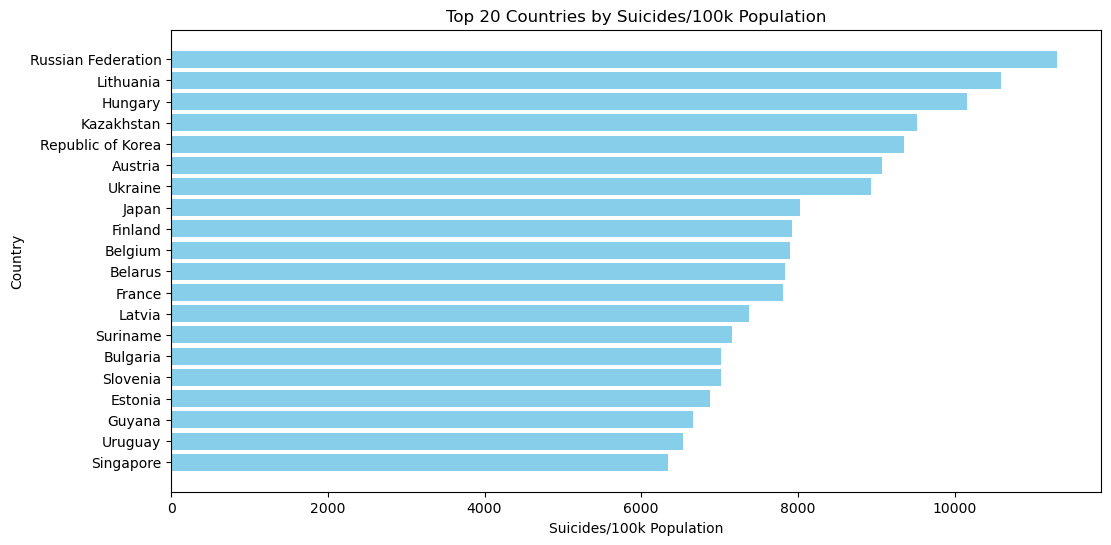

In [194]:
df = df.sort_values(by="suicides/100k", ascending=False)

# Create a bar chart with bars whose widths represent the number of suicides
suicides_by_country = (
    df.groupby("country")["suicides/100k"].sum().reset_index()
)

# Sort the data by suicides in descending order
suicides_by_country = suicides_by_country.sort_values(
    by="suicides/100k", ascending=False
)

# Select the top 20 countries
top_20_countries = suicides_by_country.head(20)

# Create a bar chart for the top 20 countries
plt.figure(figsize=(12, 6))
plt.barh(
    top_20_countries["country"],
    top_20_countries["suicides/100k"],
    color="skyblue",
)
plt.xlabel("Suicides/100k Population")
plt.ylabel("Country")
plt.title("Top 20 Countries by Suicides/100k Population")
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest suicide count at the top
plt.show()

### MLR

In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [26]:
df.head()

,country,year,sex,age_group,suicides,population,suicides/100k,country_year,hdi,gdp_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2.156625e+09,796,Boomers


In [27]:
df_cleaned = df.rename(columns={"suicides/100k": "suicides_per_100k_pop"})
df_cleaned

,country,year,sex,age_group,suicides,population,suicides_per_100k_pop,country_year,hdi,gdp_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2.156625e+09,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,6.306708e+10,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,6.306708e+10,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,6.306708e+10,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,6.306708e+10,2309,Generation Z


In [29]:
reg = smf.ols(
    "suicides_per_100k_pop~C(country)+year+C(sex)+C(age_group)+population+gdp_year+gdp_per_capita+C(generation)",
    data=df_cleaned,
).fit()

In [30]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     suicides_per_100k_pop   R-squared:                       0.520
Model:                               OLS   Adj. R-squared:                  0.518
Method:                    Least Squares   F-statistic:                     288.5
Date:                   Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                           23:21:53   Log-Likelihood:            -1.1113e+05
No. Observations:                  27820   AIC:                         2.225e+05
Df Residuals:                      27715   BIC:                         2.233e+05
Df Model:                            104                                         
Covariance Type:               nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                    144.9554     41.042      3.532      0.000      64.512     225.399
C(country)[T.Antigua and Barbuda]             -2.0687      1.095     -1.889      0.059      -4.215       0.078
C(country)[T.Argentina]                        7.1733      1.068      6.719      0.000       5.081       9.266
C(country)[T.Armenia]                         -0.1359      1.116     -0.122      0.903      -2.322       2.051
C(country)[T.Aruba]                            8.5119      1.313      6.480      0.000       5.937      11.086
C(country)[T.Australia]                       12.1287      1.120     10.829      0.000       9.933      14.324
C(country)[T.Austria]                         23.1153      1.109     20.840      0.000      20.941      25.289
C(country)[T.Azerbaijan]                      -1.9736      1.250     -1.579      0.114      -4.424       0.477
C(country)[T.Bahamas]                          0.1064      1.158      0.092      0.927      -2.163       2.376
C(country)[T.Bahrain]                          0.0293      1.169      0.025      0.980      -2.262       2.321
C(country)[T.Barbados]                         0.3648      1.116      0.327      0.744      -1.823       2.553
C(country)[T.Belarus]                         27.6578      1.160     23.838      0.000      25.384      29.932
C(country)[T.Belgium]                         20.3892      1.108     18.396      0.000      18.217      22.562
C(country)[T.Belize]                           2.9626      1.082      2.738      0.006       0.842       5.084
C(country)[T.Bosnia and Herzegovina]           2.0948      2.812      0.745      0.456      -3.416       7.606
C(country)[T.Brazil]                           1.0111      1.223      0.827      0.408      -1.386       3.408
C(country)[T.Bulgaria]                        15.9834      1.068     14.968      0.000      13.890      18.076
C(country)[T.Cabo Verde]                       8.4854      3.882      2.186      0.029       0.877      16.094
C(country)[T.Canada]                          11.1758      1.128      9.904      0.000       8.964      13.387
C(country)[T.Chile]                            7.4331      1.061      7.003      0.000       5.353       9.514
C(country)[T.Colombia]                         1.7168      1.067      1.609      0.108      -0.375       3.808
C(country)[T.Costa Rica]                       3.7754      1.068      3.535      0.000       1.682       5.869
C(country)[T.Croatia]                         20.5412      1.152     17.827      0.000      18.283      22.800
C(country)[T.Cuba]                            18.1494      1.123     16.161      0.000      15.948      20.351
C(country)[T.Cyprus]                           2.5103

#### Checking the VIF

In [200]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices(
    "suicides_per_100k_pop~C(country)+year+C(sex)+C(age_group)+population+gdp_year+gdp_per_capita+C(generation)",
    data=df_cleaned,
    return_type="dataframe",
)

vif = pd.DataFrame()
vif["VIF Factor"] = [
    variance_inflation_factor(X.values, i) for i in range(X.shape[1])
]
vif["features"] = X.columns
print(vif[vif["VIF Factor"] > 10])

/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


     VIF Factor                     features
105   13.437677  C(age_group)[T.55-74 years]
106   18.157737    C(age_group)[T.75+ years]


In [201]:
print("Printing Influential Points")

Printing Influential Points


In [1]:
fig, ax = plt.subplots(figsize=(12, 12))
fig = sm.graphics.influence_plot(reg, ax=ax, criterion="cooks")

In [203]:
import scipy

In [204]:
infl = reg.get_influence()

In [2]:
n = 27820
p = 27820 - 27715
seuil_stud = scipy.stats.t.ppf(0.975, df=n - p - 1)
# detection - absolute value > threshold
reg_studs = infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud
# which ones?
print(df_cleaned.index[atyp_stud], reg_studs[atyp_stud])

In [3]:
inflsum = infl.summary_frame()
reg_cook = inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4 / n
print(df_cleaned.index[atyp_cook], reg_cook[atyp_cook])

### CHECKING FOR HETEROSCEDASTICITY

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

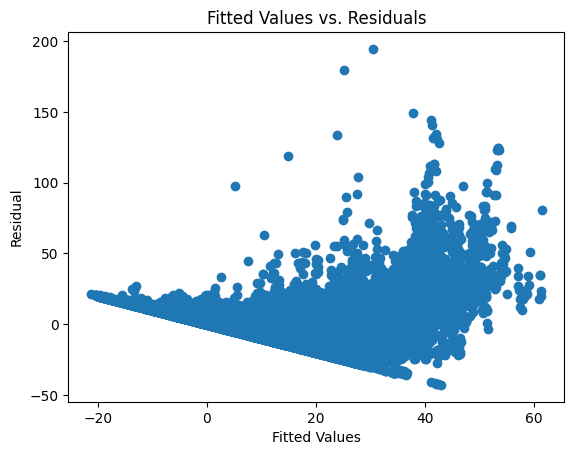

In [31]:
p = reg.fittedvalues
res = reg.resid
plt.scatter(p, res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

In [32]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(reg.resid, reg.model.exog)
labels = ["LM Statistic", "LM-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 3667.7736671991765, 'LM-Test p-value': 0.0}


(array([9.1800e+02, 1.9874e+04, 6.2060e+03, 5.7500e+02, 1.7100e+02,
        4.8000e+01, 1.4000e+01, 1.1000e+01, 1.0000e+00, 2.0000e+00]),
 array([-42.86236972, -19.12648716,   4.6093954 ,  28.34527795,
         52.08116051,  75.81704307,  99.55292562, 123.28880818,
        147.02469074, 170.76057329, 194.49645585]),
 <BarContainer object of 10 artists>)

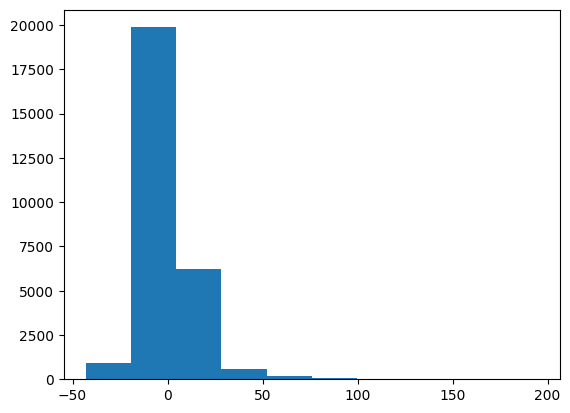

In [33]:
plt.hist(reg.resid)

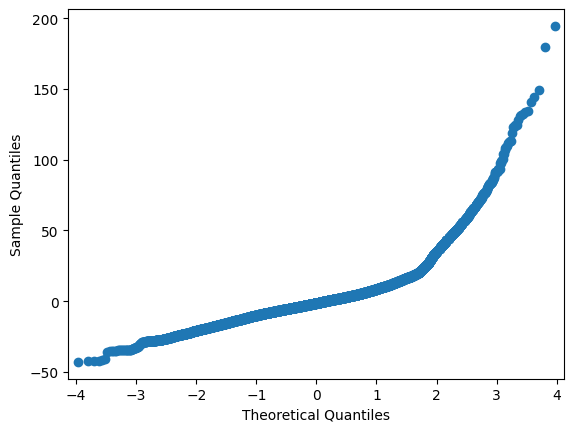

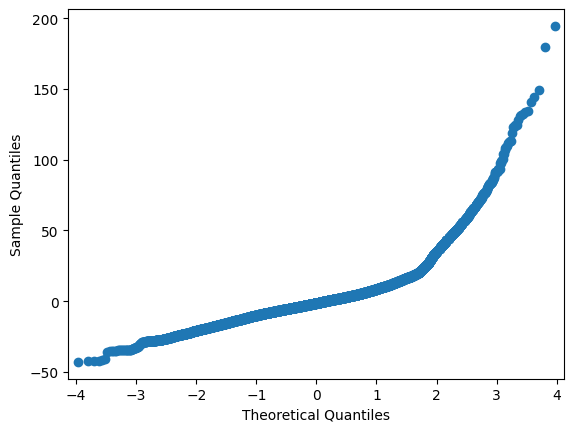

In [34]:
sm.qqplot(reg.resid)

In [35]:
from scipy.stats import kstest

kstest(reg.resid, "norm")

KstestResult(statistic=0.4466244796966761, pvalue=0.0)

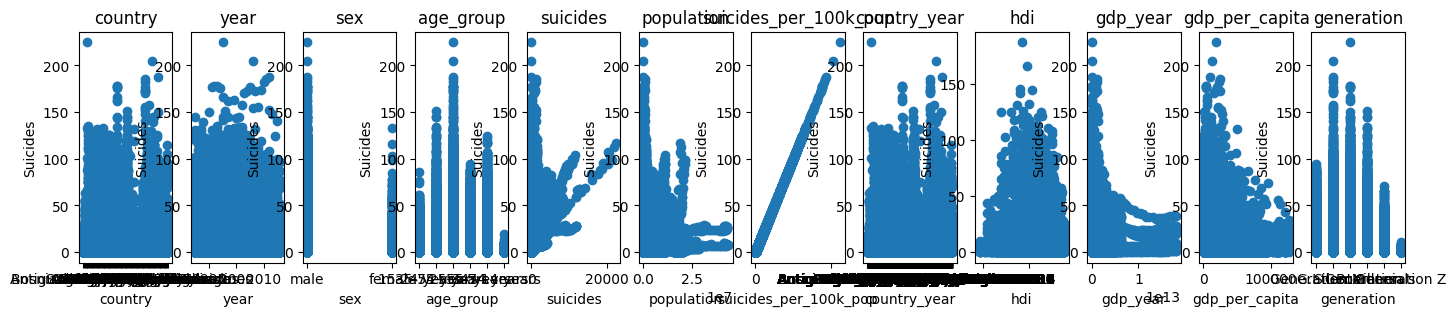

In [36]:
plt.figure(figsize=(20, 3))


# i: index
for i, col in enumerate(df_cleaned.columns):
    plt.subplot(1, 14, i + 1)
    x = df_cleaned[col]
    y = df_cleaned["suicides_per_100k_pop"]
    plt.plot(x, y, "o")

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Suicides")

In [37]:
df_cleaned["log_suicides"] = np.log(df_cleaned["suicides_per_100k_pop"])

/Users/saivamsipujari/Library/Caches/pypoetry/virtualenvs/fall1-env-VMlirAw2-py3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [38]:
df_cleaned["log_suicides_per_100k_1"] = np.log(
    df_cleaned["suicides_per_100k_pop"] + 1
)

In [39]:
reg2 = smf.ols(
    "log_suicides_per_100k_1~C(country)+year+C(sex)+C(age_group)+population+gdp_year+gdp_per_capita+C(generation)",
    data=df_cleaned,
).fit()

In [40]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_suicides_per_100k_1   R-squared:                       0.725
Model:                                 OLS   Adj. R-squared:                  0.724
Method:                      Least Squares   F-statistic:                     701.0
Date:                     Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                             23:22:09   Log-Likelihood:                -28806.
No. Observations:                    27820   AIC:                         5.782e+04
Df Residuals:                        27715   BIC:                         5.869e+04
Df Model:                              104                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      1.4371      2.129      0.675      0.500      -2.735       5.610
C(country)[T.Antigua and Barbuda]             -1.0531      0.057    -18.538      0.000      -1.164      -0.942
C(country)[T.Argentina]                        0.8052      0.055     14.539      0.000       0.697       0.914
C(country)[T.Armenia]                         -0.0738      0.058     -1.275      0.202      -0.187       0.040
C(country)[T.Aruba]                           -0.1012      0.068     -1.486      0.137      -0.235       0.032
C(country)[T.Australia]                        1.1740      0.058     20.209      0.000       1.060       1.288
C(country)[T.Austria]                          1.5523      0.058     26.982      0.000       1.440       1.665
C(country)[T.Azerbaijan]                      -0.3661      0.065     -5.647      0.000      -0.493      -0.239
C(country)[T.Bahamas]                         -0.6598      0.060    -10.986      0.000      -0.778      -0.542
C(country)[T.Bahrain]                         -0.4688      0.061     -7.731      0.000      -0.588      -0.350
C(country)[T.Barbados]                        -0.5244      0.058     -9.057      0.000      -0.638      -0.411
C(country)[T.Belarus]                          1.6276      0.060     27.046      0.000       1.510       1.746
C(country)[T.Belgium]                          1.5485      0.057     26.935      0.000       1.436       1.661
C(country)[T.Belize]                          -0.1487      0.056     -2.649      0.008      -0.259      -0.039
C(country)[T.Bosnia and Herzegovina]          -0.2581      0.146     -1.770      0.077      -0.544       0.028
C(country)[T.Brazil]                           0.2958      0.063      4.664      0.000       0.171       0.420
C(country)[T.Bulgaria]                         1.2044      0.055     21.745      0.000       1.096       1.313
C(country)[T.Cabo Verde]                       0.5956      0.201      2.958      0.003       0.201       0.990
C(country)[T.Canada]                           1.1641      0.059     19.889      0.000       1.049       1.279
C(country)[T.Chile]                            0.7691      0.055     13.970      0.000       0.661       0.877
C(country)[T.Colombia]                         0.3060      0.055      5.529      0.000       0.198       0.414
C(country)[T.Costa Rica]                       0.4349      0.055      7.850      0.000       0.326       0.543
C(country)[T.Croatia]                          1.3898      0.060     23.254      0.000       1.273       1.507
C(country)[T.Cuba]                             1.2818      0.058     22.005      0.000       1.168       1.396
C(country)[T.Cyprus]           

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

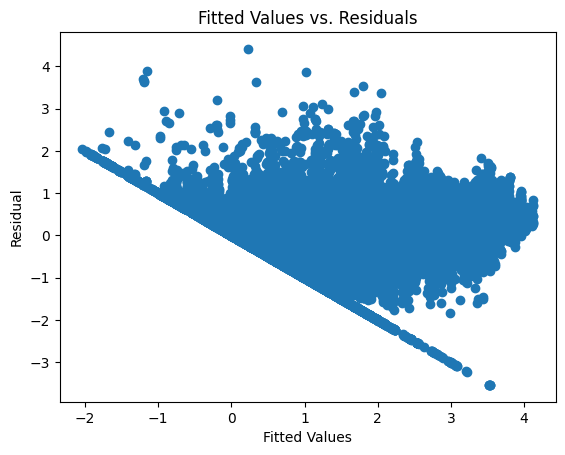

In [41]:
p = reg2.fittedvalues
res = reg2.resid
plt.scatter(p, res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

(array([3.6000e+01, 1.9900e+02, 1.0800e+03, 5.7850e+03, 1.4643e+04,
        5.0910e+03, 8.2800e+02, 1.3600e+02, 1.5000e+01, 7.0000e+00]),
 array([-3.53456872, -2.73977146, -1.9449742 , -1.15017694, -0.35537967,
         0.43941759,  1.23421485,  2.02901211,  2.82380938,  3.61860664,
         4.4134039 ]),
 <BarContainer object of 10 artists>)

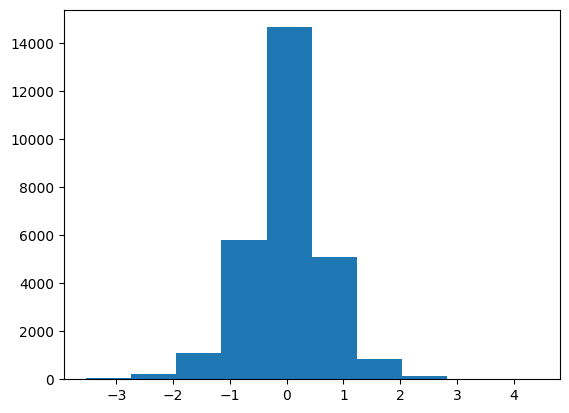

In [42]:
plt.hist(reg2.resid)

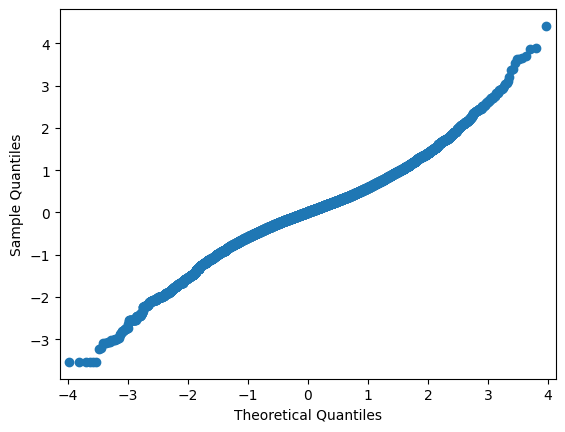

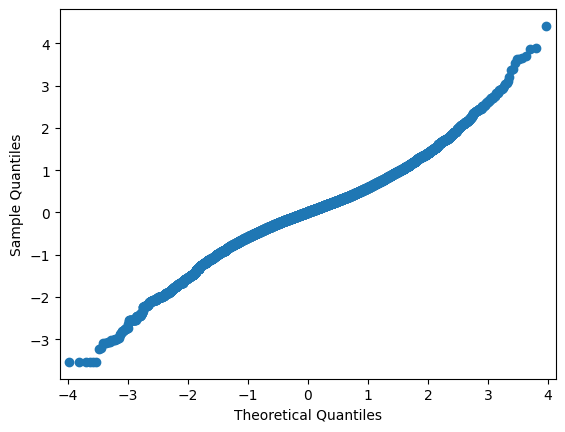

In [43]:
sm.qqplot(reg2.resid)

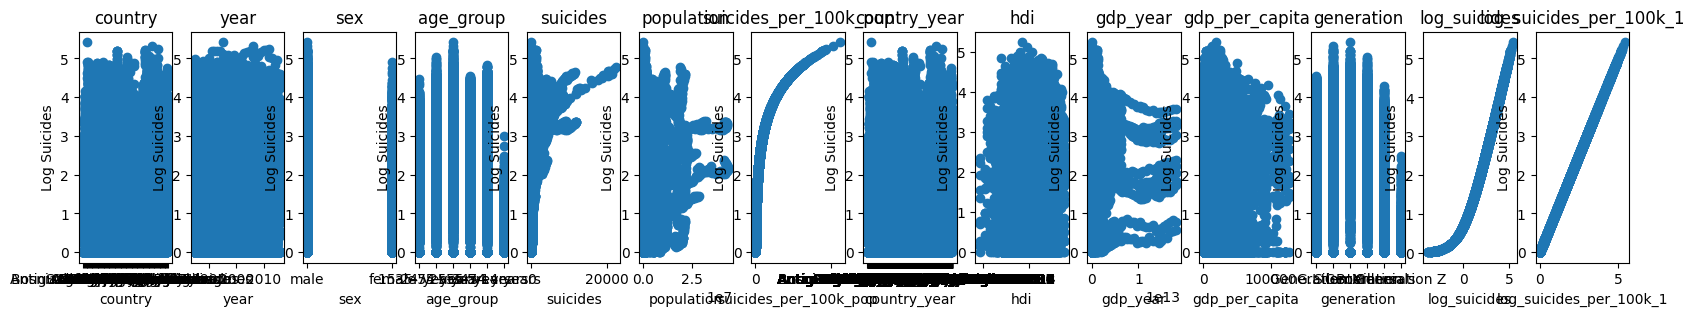

In [44]:
plt.figure(figsize=(20, 3))


# i: index
for i, col in enumerate(df_cleaned.columns):
    plt.subplot(1, 14, i + 1)
    x = df_cleaned[col]
    y = df_cleaned["log_suicides_per_100k_1"]
    plt.plot(x, y, "o")

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Log Suicides")

In [219]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices(
    "log_suicides_per_100k_1~C(country)+year+C(sex)+C(age_group)+population+gdp_year+gdp_per_capita+C(generation)",
    data=df_cleaned,
    return_type="dataframe",
)

vif = pd.DataFrame()
vif["VIF Factor"] = [
    variance_inflation_factor(X.values, i) for i in range(X.shape[1])
]
vif["features"] = X.columns
print(vif[vif["VIF Factor"] > 10])

/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


     VIF Factor                     features
105   13.437677  C(age_group)[T.55-74 years]
106   18.157737    C(age_group)[T.75+ years]


In [220]:
import statsmodels.formula.api as smf
import itertools
import pandas as pd

predictors = [
    "country",
    "year",
    "sex",
    "age_group",
    "population",
    "gdp_year",
    "gdp_per_capita",
    "generation",
]
formula_full = "log_suicides_per_100k_1~C(country)+year+C(sex)+C(age_group)+population+gdp_year+gdp_per_capita+C(generation)"
model_full = smf.ols(formula_full, data=df_cleaned).fit()
s2 = model_full.mse_resid
n = len(df_cleaned)
num_predictors, r2_values, adj_r2_values, cp_values, model_terms = (
    [],
    [],
    [],
    [],
    [],
)
for r in range(1, len(predictors) + 1):
    for variables in itertools.combinations(predictors, r):
        formula = "log_suicides_per_100k_1 ~ " + " + ".join(
            [
                "C({})".format(var)
                if var in ["country", "sex", "age_group", "generation"]
                else var
                for var in variables
            ]
        )
        model = smf.ols(formula, data=df_cleaned).fit()
        adj_r2 = model.rsquared_adj
        p = model.df_model
        SSE = model.ssr
        cp = (SSE / s2) - n + 2 * (p + 1)
        num_predictors.append(p)
        r2_values.append(model.rsquared)
        adj_r2_values.append(adj_r2)
        cp_values.append(cp)
        model_terms.append("+".join(variables))
results_df = pd.DataFrame(
    {
        "Num_Predictors": num_predictors,
        "R2": r2_values,
        "Adj_R2": adj_r2_values,
        "Cp": cp_values,
        "Model": model_terms,
    }
)
print(results_df)

     Num_Predictors        R2    Adj_R2            Cp  \
0             100.0  0.306665  0.304164  42138.978928   
1               1.0  0.000680  0.000644  72726.443684   
2               1.0  0.145322  0.145291  58173.857093   
3               5.0  0.270608  0.270477  45576.706682   
4               1.0  0.006382  0.006347  72152.708961   
..              ...       ...       ...           ...   
250           100.0  0.642274  0.640984   8373.067651   
251           103.0  0.579075  0.577511  14737.572389   
252           104.0  0.724542  0.723508    104.071335   
253            14.0  0.430590  0.430303  29498.804431   
254           104.0  0.724533  0.723499    105.000000   

                                                                        Model  
0                                                                     country  
1                                                                        year  
2                                                                         s

In [221]:
predictors = [
    "C(country)",
    "year",
    "C(sex)",
    "C(age_group)",
    "population",
    "gdp_year",
    "gdp_per_capita",
    "C(generation)",
]
candidate_formulas = [
    "log_suicides_per_100k_1 ~ " + " + ".join(variables)
    for r in range(1, len(predictors) + 1)
    for variables in itertools.combinations(predictors, r)
]

aic_values = []
bic_values = []
adj_r2_values = []
cp_values = []
num_predictors = []

for formula in candidate_formulas:
    model = smf.ols(formula, data=df_cleaned).fit()
    aic_values.append(model.aic)
    bic_values.append(model.bic)
    adj_r2_values.append(model.rsquared_adj)
    num_predictors.append(model.df_model)
    s2 = model.mse_resid
    n = len(df_cleaned)
    SSE = model.ssr
    cp = (SSE / s2) - n + 2 * (model.df_model + 1)
    cp_values.append(cp)

results_df = pd.DataFrame(
    {
        "Model": candidate_formulas,
        "AIC": aic_values,
        "BIC": bic_values,
        "Adj_R2": adj_r2_values,
        "Cp": cp_values,
        "Num_Predictors": num_predictors,
    }
)

In [222]:
top_r2_models = set(
    results_df.sort_values(by="Adj_R2", ascending=False).head(10)["Model"]
)
top_aic_models = set(results_df.sort_values(by="AIC").head(10)["Model"])
top_bic_models = set(results_df.sort_values(by="BIC").head(10)["Model"])
common_models = top_r2_models.intersection(top_aic_models).intersection(
    top_bic_models
)
common_models_df = results_df[results_df["Model"].isin(common_models)]
print(common_models_df)

                                                                                                                            Model  \
233                         log_suicides_per_100k_1 ~ C(country) + C(sex) + C(age_group) + population + gdp_year + gdp_per_capita   
236                      log_suicides_per_100k_1 ~ C(country) + C(sex) + C(age_group) + gdp_year + gdp_per_capita + C(generation)   
246                  log_suicides_per_100k_1 ~ C(country) + year + C(sex) + C(age_group) + population + gdp_year + gdp_per_capita   
249               log_suicides_per_100k_1 ~ C(country) + year + C(sex) + C(age_group) + gdp_year + gdp_per_capita + C(generation)   
252         log_suicides_per_100k_1 ~ C(country) + C(sex) + C(age_group) + population + gdp_year + gdp_per_capita + C(generation)   
254  log_suicides_per_100k_1 ~ C(country) + year + C(sex) + C(age_group) + population + gdp_year + gdp_per_capita + C(generation)   

              AIC           BIC    Adj_R2     Cp  Num_Predictors  
2

In [223]:
best_common_model = common_models_df.sort_values(
    by="Adj_R2", ascending=False
).iloc[0]
print(best_common_model)

Model             log_suicides_per_100k_1 ~ C(country) + C(sex) + C(age_group) + population + gdp_year + gdp_per_capita + C(generation)
AIC                                                                                                                        57822.941693
BIC                                                                                                                        58687.460292
Adj_R2                                                                                                                         0.723508
Cp                                                                                                                                105.0
Num_Predictors                                                                                                                    104.0
Name: 252, dtype: object


In [224]:
pd.set_option("display.max_colwidth", None)
print(best_common_model["Model"])

log_suicides_per_100k_1 ~ C(country) + C(sex) + C(age_group) + population + gdp_year + gdp_per_capita + C(generation)


In [ ]:
print(
    "Best model is one with log_suicides_per_100k_1 ~ C(country) + C(sex) + C(age_group) + population + gdp_year + gdp_per_capita + C(generation)"
)

Best model is one with log_suicides_per_100k_1 ~ C(country) + C(sex) + C(age_group) + population + gdp_year + gdp_per_capita + C(generation)


In [45]:
reg3 = smf.ols(
    "log_suicides_per_100k_1 ~ C(country) + C(sex) + C(age_group) + population + gdp_year + gdp_per_capita + C(generation)",
    data=df_cleaned,
).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_suicides_per_100k_1   R-squared:                       0.725
Model:                                 OLS   Adj. R-squared:                  0.723
Method:                      Least Squares   F-statistic:                     700.9
Date:                     Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                             23:22:40   Log-Likelihood:                -28807.
No. Observations:                    27820   AIC:                         5.782e+04
Df Residuals:                        27715   BIC:                         5.869e+04
Df Model:                              104                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.7335      0.047     15.604      0.000       0.641       0.826
C(country)[T.Antigua and Barbuda]             -1.0590      0.057    -18.644      0.000      -1.170      -0.948
C(country)[T.Argentina]                        0.8054      0.055     14.546      0.000       0.697       0.914
C(country)[T.Armenia]                         -0.0767      0.058     -1.326      0.185      -0.190       0.037
C(country)[T.Aruba]                           -0.0929      0.068     -1.360      0.174      -0.227       0.041
C(country)[T.Australia]                        1.1751      0.058     20.411      0.000       1.062       1.288
C(country)[T.Austria]                          1.5593      0.057     27.335      0.000       1.447       1.671
C(country)[T.Azerbaijan]                      -0.3818      0.065     -5.905      0.000      -0.509      -0.255
C(country)[T.Bahamas]                         -0.6547      0.060    -10.943      0.000      -0.772      -0.537
C(country)[T.Bahrain]                         -0.4667      0.061     -7.713      0.000      -0.585      -0.348
C(country)[T.Barbados]                        -0.5330      0.058     -9.203      0.000      -0.647      -0.419
C(country)[T.Belarus]                          1.6317      0.060     27.146      0.000       1.514       1.750
C(country)[T.Belgium]                          1.5544      0.057     27.255      0.000       1.443       1.666
C(country)[T.Belize]                          -0.1522      0.056     -2.708      0.007      -0.262      -0.042
C(country)[T.Bosnia and Herzegovina]          -0.2619      0.146     -1.796      0.072      -0.548       0.024
C(country)[T.Brazil]                           0.3001      0.063      4.746      0.000       0.176       0.424
C(country)[T.Bulgaria]                         1.2066      0.055     21.795      0.000       1.098       1.315
C(country)[T.Cabo Verde]                       0.6035      0.201      3.003      0.003       0.210       0.997
C(country)[T.Canada]                           1.1682      0.058     20.157      0.000       1.055       1.282
C(country)[T.Chile]                            0.7688      0.055     13.962      0.000       0.661       0.877
C(country)[T.Colombia]                         0.3057      0.055      5.522      0.000       0.197       0.414
C(country)[T.Costa Rica]                       0.4372      0.055      7.895      0.000       0.329       0.546
C(country)[T.Croatia]                          1.3781      0.060     23.108      0.000       1.261       1.495
C(country)[T.Cuba]                             1.2739      0.058     21.871      0.000       1.160       1.388
C(country)[T.Cyprus]           

# Regularization

In [46]:
X = df_cleaned[
    [
        "country",
        "sex",
        "age_group",
        "population",
        "gdp_year",
        "gdp_per_capita",
        "generation",
    ]
]

y = df_cleaned["log_suicides_per_100k_1"]

In [47]:
categorical_columns = ["country", "sex", "age_group", "generation"]
penalty_categorical = " + ".join(
    [f"I({column})" for column in categorical_columns]
)

numeric_columns = ["gdp_year", "population", "gdp_per_capita"]
penalty_numeric = " + ".join([f"I({column}**2)" for column in numeric_columns])

formula_reduce = "log_suicides_per_100k_1 ~ C(country) + C(sex) + C(age_group) + population + gdp_per_capita + C(generation)"
formula_with_penalty = (
    f"{formula_reduce} + {penalty_categorical} + {penalty_numeric}"
)


def get_r2(model, X, y):
    y_pred = model.predict(X)
    residuals = y - y_pred

    RSS = np.sum(residuals**2)
    TSS = np.sum((y - np.mean(y)) ** 2)

    n = len(y)
    k = X.shape[1]

    R_squared = 1 - (RSS / TSS)
    adjusted_R_squared = 1 - ((1 - R_squared) * (n - 1) / (n - k - 1))

    # print(f"R^2: {R_squared:.4f}")
    # print(f"Adjusted R^2: {adjusted_R_squared:.4f}")
    return R_squared, adjusted_R_squared

In [48]:
import patsy

# Define the formula
formula_reduce = "log_suicides_per_100k_1 ~ C(country) + C(sex) + C(age_group) + population + gdp_per_capita + C(generation)"

# Create the design matrix using the formula and your DataFrame
y, X = patsy.dmatrices(
    formula_reduce, data=df_cleaned, return_type="dataframe"
)

# Now, X contains the modified DataFrame with the specified formula

In [49]:
X.head()

,Intercept,C(country)[T.Antigua and Barbuda],C(country)[T.Argentina],C(country)[T.Armenia],C(country)[T.Aruba],C(country)[T.Australia],C(country)[T.Austria],C(country)[T.Azerbaijan],C(country)[T.Bahamas],C(country)[T.Bahrain],...,C(age_group)[T.5-14 years],C(age_group)[T.55-74 years],C(age_group)[T.75+ years],C(generation)[T.G.I. Generation],C(generation)[T.Generation X],C(generation)[T.Generation Z],C(generation)[T.Millenials],C(generation)[T.Silent],population,gdp_per_capita
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,312900.0,796.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,308000.0,796.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,289700.0,796.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,21800.0,796.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,274300.0,796.0


## Ridge regression

In [50]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge regression model with cross-validation for alpha selection
ridge = RidgeCV(
    alphas=np.logspace(-6, 6, 13), cv=5
)  # alphas to try are from 1e-6 to 1e6

# Train
ridge.fit(X_train_scaled, y_train)

# predictions
predictions = ridge.predict(X_test_scaled)

# R^2 score and adjusted R^2 score
r2 = r2_score(y_test, predictions)
n = len(y_test)
p = X.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("R^2 Score:", r2)
print("Adjusted R^2 Score:", adj_r2)

R^2 Score: 0.7191239754967043
Adjusted R^2 Score: 0.7132476923633999


## Lasso Regression

In [51]:
from sklearn.linear_model import LassoCV

# Lasso regression model with cross-validation for alpha selection
lasso = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5)

# Train
lasso.fit(X_train_scaled, y_train)

# predictions
predictions = lasso.predict(X_test_scaled)

# R^2 score and adjusted R^2 score
r2 = r2_score(y_test, predictions)
n = len(y_test)
p = X.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("R^2 Score:", r2)
print("Adjusted R^2 Score:", adj_r2)

/Users/saivamsipujari/Library/Caches/pypoetry/virtualenvs/fall1-env-VMlirAw2-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R^2 Score: 0.7191241377583075
Adjusted R^2 Score: 0.7132478580197219


### PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features (necessary for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA
num_components = 85
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Ridge regression model with cross-validation for alpha selection
ridge = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)

# Train the model with PCA-transformed features
ridge.fit(X_train_pca, y_train)

# predictions
predictions = ridge.predict(X_test_pca)

# R^2 score and adjusted R^2 score with PCA-transformed features
r2_with_pca = r2_score(y_test, predictions)
n = len(y_test)
p = num_components  # number of PCA components
adj_r2_with_pca = 1 - ((1 - r2_with_pca) * (n - 1) / (n - p - 1))

print("R^2 Score with PCA:", r2_with_pca)
print("Adjusted R^2 Score with PCA:", adj_r2_with_pca)

R^2 Score with PCA: 0.5430639401433676
Adjusted R^2 Score with PCA: 0.5359738406384728
